In [4]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
import pickle

print('Chargement des données...')
# Charger le dataset "digits"
#digits = load_digits()
#x, y = digits['data'], digits['target']
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

x = x/255

# Division des données en train et test
print('Séparation des données en train et test...')
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 60000,test_size=10000, random_state=42
)

# Normalisation
print("Normalisation")
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)  # Ici, on n'utilise pas fit_transform sur x_test pour éviter de faire "le fit" sur les données de test

print('Entrainement du modèle...')
# Construction du pipeline pour normalisation et SVM
model = SVC(C=5, kernel='rbf', gamma=0.001)
model.fit(x_train, y_train)
print("Fin de l'entrainement")

# Évaluation du modèle avec cross-validation
#scores = cross_val_score(model, x_train, y_train, cv=5)
#print("Scores de validation croisée : ", scores)
#print("Score moyen : ", scores.mean())
#print(x_test.shape)
#print(y_test)

print("sauvegarde du modèle")



 
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))



Chargement des données...


C:\Users\gadeu\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Séparation des données en train et test...
Normalisation
Entrainement du modèle...
Fin de l'entrainement
sauvegarde du modèle


In [9]:
import pickle
import numpy as np
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

#recupérons les coefficients du svm à noyau RBF
#vecteurs de supports
vecteurs_supports = model.support_vectors_
#coefficients de chaque classe
coefficients = model.dual_coef_
#le bias
biais = model.intercept_

print("vecteurs de support:\n",vecteurs_supports)
print("taille")
print(vecteurs_supports.shape)
print("coefficients:\n",coefficients)
print("bias:\n",biais)

np.savetxt("vecteurs_support.txt",vecteurs_supports)
np.savetxt("coefficients.txt",coefficients)
np.savetxt("biais.txt",biais)





vecteurs de support:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
taille
(14447, 784)
coefficients:
 [[ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          5.         ... -0.         -0.
  -1.36754528]
 [ 0.          0.          0.         ... -0.         -5.
  -0.        ]
 ...
 [ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -5.         -1.94299199
  -0.        ]]
bias:
 [ 0.57638115 -1.21452115 -0.5318417   0.56271783 -1.76393478  0.28083969
 -0.62770402  0.78785975  0.16280448 -2.28095315 -2.28961069  1.06946806
 -2.38327103  0.11461234 -0.61678807  3.06534261  0.5414132   1.13914563
  2.14828731 -0.46636981  3.21276464  1.85501112  6.72823034  2.02431663
  2.07028918 -2.90094214  1.65704444

Label réel: 5
Label prédit: 5


C:\Users\gadeu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


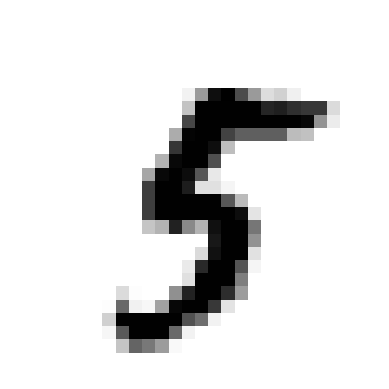

In [11]:
prediction_index = 65
true_label = y_test.iloc[prediction_index]  # Conversion en tableau NumPy
#true_label = y_test[prediction_index]  # Conversion en tableau NumPy
example = x_test.iloc[prediction_index]

predicted_label = model.predict([example])[0]
print(f"Label réel: {true_label}")
print(f"Label prédit: {predicted_label}")

# Affichage de l'image associée
#example_image = example.reshape(28, 28)
#plt.imshow(example_image, cmap="binary", interpolation='nearest')
#plt.axis("off")
#plt.show()

# Affichage d'une image d'exemple
plt.imshow(np.array(example).reshape(28, 28), cmap="binary", interpolation='nearest')
plt.axis("off")

plt.show()

In [12]:
from PIL import Image
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """
    Prétraiter l'image : 
    1. Charger l'image.
    2. Convertir en niveaux de gris.
    3. Redimensionner à 28x28 pixels pour correspondre à `load_digits`.
    4. Aplatir l'image en un vecteur de 784 éléments.
    """
    # Résoudre le ~ dans le chemin du fichier
    image_path = os.path.expanduser(image_path)
    
    # Utiliser `with` pour ouvrir l'image de manière sûre
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convertir en niveaux de gris
        img = img.resize((28, 28))  # Redimensionner l'image à 28x28 pixels
        img_array = np.array(img)  # Convertir en tableau numpy

        # Normaliser l'image si nécessaire, par exemple ici en divisant par 255
        img_array = 255 - img_array
        img_array = img_array / 255.0

        # Aplatir l'image en un vecteur de 784 éléments (28x28)
        img_vector = img_array.flatten()
    
    return img_vector.reshape(1, -1)  # Assurez-vous de retourner un tableau 2D

def predict_digit(image_path, model):
    """
    Prédit le chiffre dans une image donnée par son chemin local.
    La normalisation est effectuée dans preprocess_image avant la prédiction.
    """
    # Prétraiter l'image et normaliser
    img_vector_normalized = preprocess_image(image_path)

    # Faire la prédiction avec le modèle
    predicted_label = model.predict(img_vector_normalized)[0]
    print(f"Chiffre prédit : {predicted_label}")
    
    return predicted_label, img_vector_normalized

# Charger le modèle sauvegardé
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

# Exemple d'utilisation avec un chemin local :
image_path = os.path.expanduser('~/School/M1 SD/Gestion_de_projet_IA/chiffre_manuscrit/images/un.png') 
predicted_digit_label, predicted_digit = predict_digit(image_path, model)

# Affichage de l'image associée
example_image = predicted_digit.reshape(28, 28)  # Reshape le vecteur de 784 à 28x28
plt.imshow(example_image, cmap="binary", interpolation='nearest')
plt.axis("off")
plt.show()

print(f"Le chiffre prédit est : {predicted_digit_label}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gadeu/School/M1 SD/Gestion_de_projet_IA/chiffre_manuscrit/images/un.png'

In [77]:
# load the model from disk


Chiffre prédit : 7


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


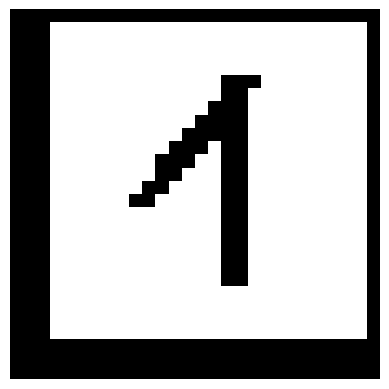

Le chiffre prédit est : 7


In [78]:
from PIL import Image
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

def preprocess_image(image_path):
    """
    Prétraiter l'image : 
    1. Charger l'image.
    2. Convertir en niveaux de gris.
    3. Redimensionner à 28x28 pixels pour correspondre à `load_digits`.
    4. Appliquer la binarisation d'Otsu.
    5. Aplatir l'image en un vecteur de 784 éléments.
    """
    # Résoudre le ~ dans le chemin du fichier
    image_path = os.path.expanduser(image_path)
    
    # Utiliser `with` pour ouvrir l'image de manière sûre
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convertir en niveaux de gris
        img = img.resize((28, 28))  # Redimensionner l'image à 28x28 pixels
        img_array = np.array(img)  # Convertir en tableau numpy

        # Application de la binarisation d'Otsu
        threshold_value = threshold_otsu(img_array)
        img_array_binary = img_array > threshold_value  # Binarisation (True pour blanc, False pour noir)

        # Aplatir l'image binaire en un vecteur de 784 éléments
        img_vector = img_array_binary.flatten().astype(int)  # Convertir en 0 et 1
    
    return img_vector.reshape(1, -1)  # Assurez-vous de retourner un tableau 2D

def predict_digit(image_path, model):
    """
    Prédit le chiffre dans une image donnée par son chemin local.
    La binarisation est effectuée dans preprocess_image avant la prédiction.
    """
    # Prétraiter l'image et binariser
    img_vector_binary = preprocess_image(image_path)

    # Faire la prédiction avec le modèle
    predicted_label = model.predict(img_vector_binary)[0]
    print(f"Chiffre prédit : {predicted_label}")
    
    return predicted_label, img_vector_binary

# Charger le modèle sauvegardé
filename = 'finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

# Exemple d'utilisation avec un chemin local :
image_path = os.path.expanduser('~/School/M1 SD/Gestion_de_projet_IA/chiffre_manuscrit/images/un.png') 
predicted_digit_label, predicted_digit = predict_digit(image_path, model)

# Affichage de l'image associée
example_image = predicted_digit.reshape(28, 28)  # Reshape le vecteur de 784 à 28x28
plt.imshow(example_image, cmap="binary", interpolation='nearest')
plt.axis("off")
plt.show()

print(f"Le chiffre prédit est : {predicted_digit_label}")


In [ ]:
import java.io.*;
import java.util.*;

public class SVMModel {

    private double[][] supportVectors;  // Vecteurs de support
    private double[] coefficients;      // Coefficients associés aux vecteurs de support
    private double bias;               // Le biais (intercept)

    // Charger le modèle depuis des fichiers externes
    public SVMModel(String supportVectorsFile, String coefficientsFile, String interceptFile) throws IOException {
        this.supportVectors = loadMatrix(supportVectorsFile);
        this.coefficients = loadVector(coefficientsFile);
        this.bias = loadBias(interceptFile);
    }

    // Fonction pour charger une matrice (vecteurs de support)
    private double[][] loadMatrix(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<double[]> lines = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            String[] values = line.split(" ");
            double[] row = new double[values.length];
            for (int i = 0; i < values.length; i++) {
                row[i] = Double.parseDouble(values[i]);
            }
            lines.add(row);
        }
        br.close();
        return lines.toArray(new double[0][]);
    }

    // Fonction pour charger un vecteur (coefficients)
    private double[] loadVector(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<Double> list = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            list.add(Double.parseDouble(line));
        }
        br.close();
        double[] vector = new double[list.size()];
        for (int i = 0; i < list.size(); i++) {
            vector[i] = list.get(i);
        }
        return vector;
    }

    // Fonction pour charger le biais
    private double loadBias(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        String line = br.readLine();
        br.close();
        return Double.parseDouble(line);
    }

    // Prédiction pour une nouvelle entrée (par exemple, une image transformée en un vecteur)
    public double predict(double[] x) {
        double result = 0;
        for (int i = 0; i < supportVectors.length; i++) {
            // Calcul du produit scalaire entre le vecteur de support et l'entrée x
            double dotProduct = 0;
            for (int j = 0; j < supportVectors[i].length; j++) {
                dotProduct += supportVectors[i][j] * x[j];
            }
            // Ajout au résultat, pondéré par les coefficients
            result += coefficients[i] * dotProduct;
        }
        // Ajouter le biais
        result += bias;
        return result;
    }

    public static void main(String[] args) throws IOException {
        // Charger les fichiers du modèle
        SVMModel model = new SVMModel("support_vectors.txt", "coefficients.txt", "intercept.txt");

        // Exemple de prédiction : un nouveau vecteur (image transformée)
        double[] newImage = { /* Votre image transformée en vecteur ici */ };
        double prediction = model.predict(newImage);
        System.out.println("Prédiction : " + prediction);
    }
}


In [ ]:
import java.io.*;
import java.util.*;

public class SVM_RBF_Model {

    private double[][] supportVectors;  // Vecteurs de support
    private double[] alphas;           // Coefficients (alphas) associés aux vecteurs de support
    private double bias;               // Le biais (intercept)
    private double gamma;              // Paramètre gamma pour le noyau RBF

    // Charger le modèle depuis des fichiers externes
    public SVM_RBF_Model(String supportVectorsFile, String alphasFile, String biasFile, double gamma) throws IOException {
        this.supportVectors = loadMatrix(supportVectorsFile);
        this.alphas = loadVector(alphasFile);
        this.bias = loadBias(biasFile);
        this.gamma = gamma;
    }

    // Fonction pour charger une matrice (vecteurs de support)
    private double[][] loadMatrix(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<double[]> lines = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            String[] values = line.split(" ");
            double[] row = new double[values.length];
            for (int i = 0; i < values.length; i++) {
                row[i] = Double.parseDouble(values[i]);
            }
            lines.add(row);
        }
        br.close();
        return lines.toArray(new double[0][]);
    }

    // Fonction pour charger un vecteur (alphas)
    private double[] loadVector(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<Double> list = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            list.add(Double.parseDouble(line));
        }
        br.close();
        double[] vector = new double[list.size()];
        for (int i = 0; i < list.size(); i++) {
            vector[i] = list.get(i);
        }
        return vector;
    }

    // Fonction pour charger le biais
    private double loadBias(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        String line = br.readLine();
        br.close();
        return Double.parseDouble(line);
    }

    // Calcul de la fonction noyau RBF
    private double rbfKernel(double[] x, double[] supportVector) {
        double sum = 0;
        for (int i = 0; i < x.length; i++) {
            sum += (x[i] - supportVector[i]) * (x[i] - supportVector[i]);
        }
        return Math.exp(-gamma * sum);  // RBF kernel: exp(-gamma * ||x - x_i||^2)
    }

    // Prédiction pour une nouvelle entrée (image transformée en un vecteur)
    public double predict(double[] x) {
        double result = 0;
        for (int i = 0; i < supportVectors.length; i++) {
            // Calcul du noyau RBF entre l'entrée x et le vecteur de support
            double kernelValue = rbfKernel(x, supportVectors[i]);
            result += alphas[i] * kernelValue;
        }
        // Ajouter le biais
        result += bias;
        return result;
    }

    public static void main(String[] args) throws IOException {
        // Charger le modèle RBF
        SVM_RBF_Model model = new SVM_RBF_Model("support_vectors_rbf.txt", "alphas_rbf.txt", "bias_rbf.txt", 0.5);

        // Exemple de prédiction : un nouveau vecteur (image transformée)
        double[] newImage = { /* Votre image transformée en vecteur ici */ };
        double prediction = model.predict(newImage);
        System.out.println("Prédiction : " + prediction);
    }
}


In [ ]:
import java.io.*;
import java.util.*;

public class SVM_RBF_Model {

    private double[][] supportVectors;  // Vecteurs de support
    private double[] alphas;           // Coefficients (alphas) associés aux vecteurs de support
    private double bias;               // Le biais (intercept)
    private double gamma;              // Paramètre gamma pour le noyau RBF

    // Charger le modèle depuis des fichiers externes
    public SVM_RBF_Model(String supportVectorsFile, String alphasFile, String biasFile, double gamma) throws IOException {
        this.supportVectors = loadMatrix(supportVectorsFile);
        this.alphas = loadVector(alphasFile);
        this.bias = loadBias(biasFile);
        this.gamma = gamma;
    }

    // Fonction pour charger une matrice (vecteurs de support)
    private double[][] loadMatrix(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<double[]> lines = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            String[] values = line.split(" ");
            double[] row = new double[values.length];
            for (int i = 0; i < values.length; i++) {
                row[i] = Double.parseDouble(values[i]);
            }
            lines.add(row);
        }
        br.close();
        return lines.toArray(new double[0][]);
    }

    // Fonction pour charger un vecteur (alphas)
    private double[] loadVector(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        List<Double> list = new ArrayList<>();
        String line;
        while ((line = br.readLine()) != null) {
            list.add(Double.parseDouble(line));
        }
        br.close();
        double[] vector = new double[list.size()];
        for (int i = 0; i < list.size(); i++) {
            vector[i] = list.get(i);
        }
        return vector;
    }

    // Fonction pour charger le biais
    private double loadBias(String file) throws IOException {
        BufferedReader br = new BufferedReader(new FileReader(file));
        String line = br.readLine();
        br.close();
        return Double.parseDouble(line);
    }

    // Calcul du noyau RBF entre un vecteur d'entrée x et un vecteur de support x_i
    public double rbfKernel(double[] x, double[] supportVector, double gamma) {
        double sum = 0;
        for (int i = 0; i < x.length; i++) {
            sum += (x[i] - supportVector[i]) * (x[i] - supportVector[i]);
        }
        return Math.exp(-gamma * sum);  // RBF kernel: exp(-gamma * ||x - x_i||^2)
    }

    // Prédiction pour une nouvelle entrée (image transformée en vecteur)
    public double predict(double[] x) {
        double result = 0;
        for (int i = 0; i < supportVectors.length; i++) {
            // Calcul du noyau RBF entre l'entrée x et le vecteur de support supportVectors[i]
            double kernelValue = rbfKernel(x, supportVectors[i], gamma);
            // Ajouter la contribution du vecteur de support avec le coefficient alpha
            result += alphas[i] * kernelValue;
        }
        // Ajouter le biais
        result += bias;
        return result;
    }

    public static void main(String[] args) throws IOException {
        // Charger le modèle RBF
        SVM_RBF_Model model = new SVM_RBF_Model("support_vectors_rbf.txt", "alphas_rbf.txt", "bias_rbf.txt", 0.5);

        // Exemple de prédiction : un nouveau vecteur (image transformée)
        double[] newImage = { /* Votre image transformée en vecteur ici */ };
        double prediction = model.predict(newImage);
        System.out.println("Prédiction : " + prediction);
    }
}
